
<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>

# Aprendizagem não supervisionada

## Eduardo Pécora, Ph.D.

## Clustering

### Objetivos:

* Aprender a avaliar os clusters
* Identificar as características que fazem do cluster algo único

---

## Case Customer marketing

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [18]:
## fonte dos dados https://www.kaggle.com/datasets/mahdinavaei/customermarketing

df = pd.read_csv("https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/Customer_marketing.csv", sep = "\t")
df.head()

,ID_,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_                  2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [20]:
df.shape

(2240, 29)

In [21]:
df.columns

Index(['ID_', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [22]:
df_cust = df.drop(['ID_', 'Education', 'Income', 'Marital_Status','Dt_Customer','Z_CostContact', 'Z_Revenue'], axis = 1)

In [23]:
df_cust.head()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,0,0,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,1,1,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,0,0,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,0
3,1984,1,0,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,0
4,1981,1,0,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,0


In [24]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year_Birth           2240 non-null   int64
 1   Kidhome              2240 non-null   int64
 2   Teenhome             2240 non-null   int64
 3   Recency              2240 non-null   int64
 4   MntWines             2240 non-null   int64
 5   MntFruits            2240 non-null   int64
 6   MntMeatProducts      2240 non-null   int64
 7   MntFishProducts      2240 non-null   int64
 8   MntSweetProducts     2240 non-null   int64
 9   MntGoldProds         2240 non-null   int64
 10  NumDealsPurchases    2240 non-null   int64
 11  NumWebPurchases      2240 non-null   int64
 12  NumCatalogPurchases  2240 non-null   int64
 13  NumStorePurchases    2240 non-null   int64
 14  NumWebVisitsMonth    2240 non-null   int64
 15  AcceptedCmp3         2240 non-null   int64
 16  AcceptedCmp4         224

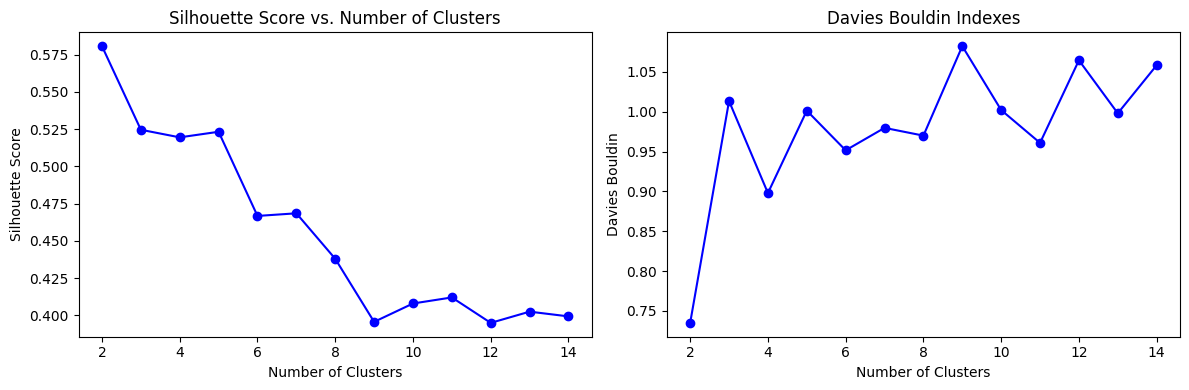

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Initialize an empty list to store SSE (Sum of Squared Errors) for the elbow method
davies_bouldin_indices = []

# Define a range of possible cluster numbers to try
cluster_range = range(2, 15)

# Iterate through the range of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 'auto')
    kmeans.fit(df_cust)
    labels = kmeans.fit_predict(df_cust)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_cust, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate Davies-Bolduin
    davies_bouldin_avg = davies_bouldin_score(df_cust, labels)
    davies_bouldin_indices.append(davies_bouldin_avg)


# Plot silhouette scores
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, 'bo-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot Davies Bouldin Indexes
plt.subplot(1, 2, 2)
plt.plot(cluster_range, davies_bouldin_indices, 'bo-')
plt.title('Davies Bouldin Indexes')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin')

plt.tight_layout()
plt.show()

In [32]:
k_means = KMeans(init = "k-means++", n_clusters = 9, n_init = 100)
k_means.fit(df_cust)
k_means_labels = k_means.labels_
k_means_labels

array([3, 0, 4, ..., 8, 4, 0], dtype=int32)

<Axes: xlabel='cluster', ylabel='Count'>

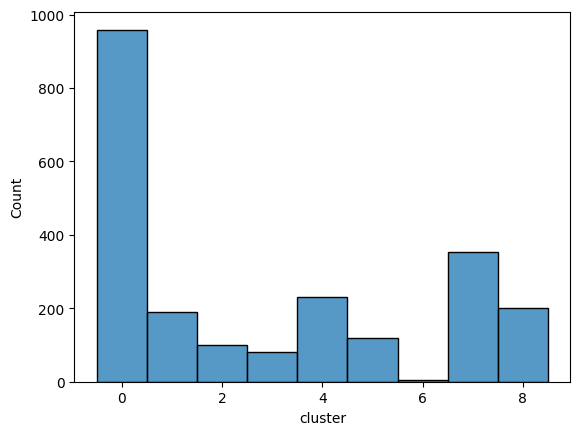

In [36]:
sns.histplot(df_cluster['cluster'],discrete=True)

In [33]:
df_cluster = df_cust.copy()
df_cluster["cluster"] = k_means_labels
df_cluster.head()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,cluster
0,1957,0,0,58,635,88,546,172,88,88,...,4,7,0,0,0,0,0,0,1,3
1,1954,1,1,38,11,1,6,2,1,6,...,2,5,0,0,0,0,0,0,0,0
2,1965,0,0,26,426,49,127,111,21,42,...,10,4,0,0,0,0,0,0,0,4
3,1984,1,0,26,11,4,20,10,3,5,...,4,6,0,0,0,0,0,0,0,0
4,1981,1,0,94,173,43,118,46,27,15,...,6,5,0,0,0,0,0,0,0,7


# Como determinar o perfil do consumidor de  cada Cluster ?

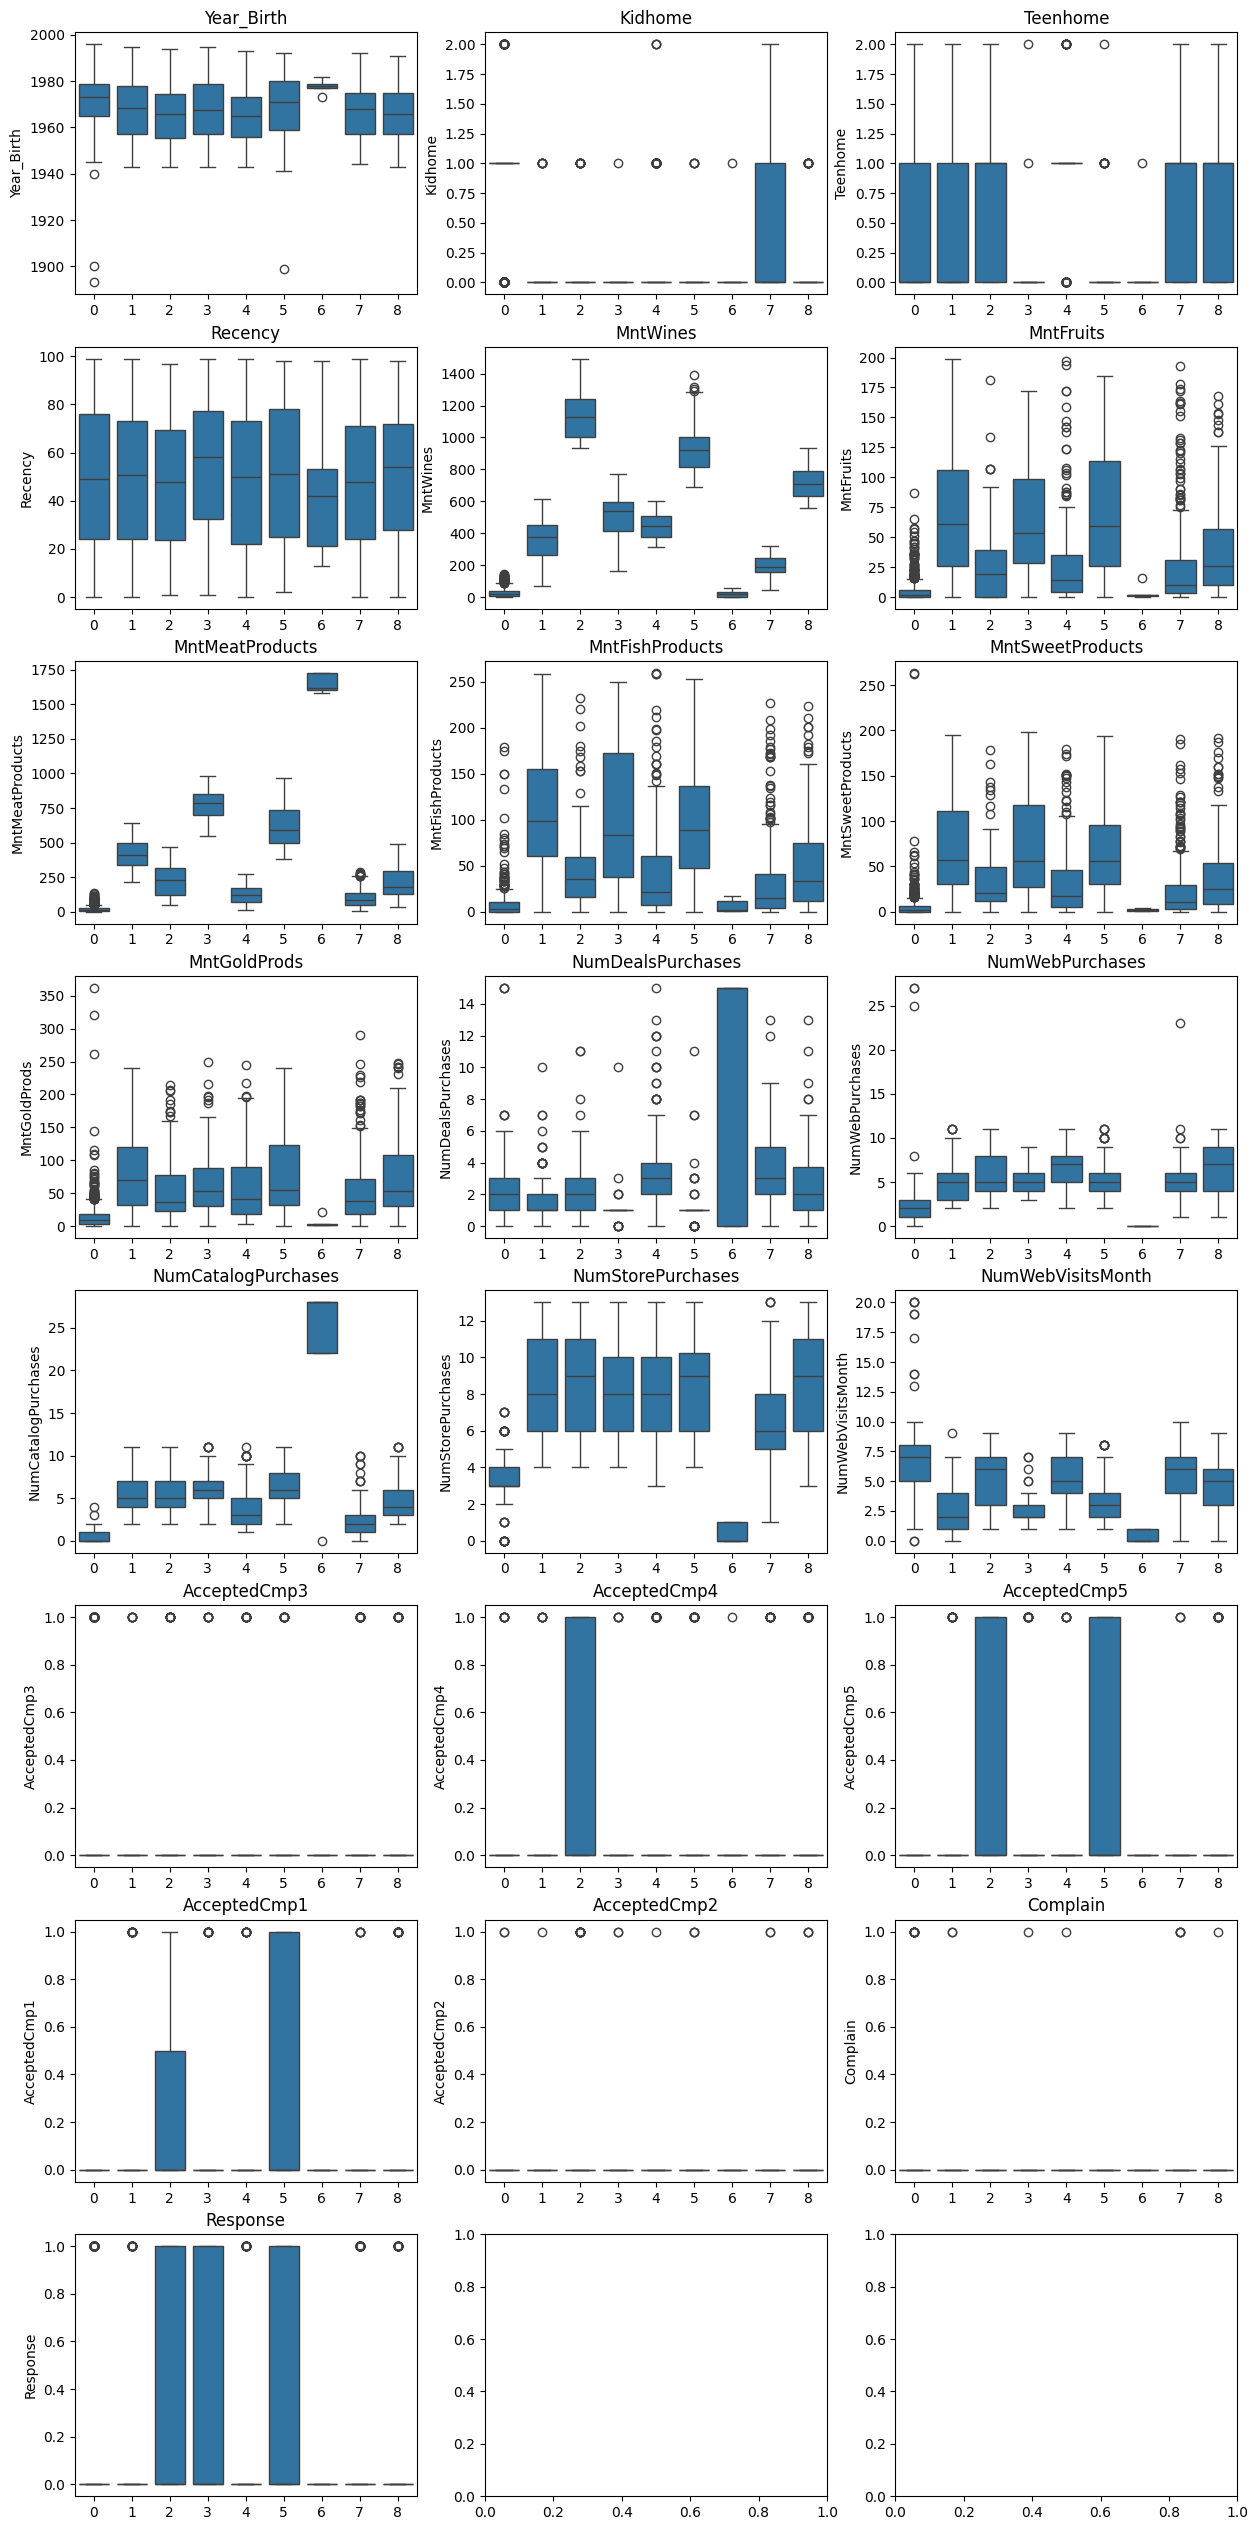

In [37]:
import seaborn as sns

col = df_cluster.drop(["cluster"], axis =1).columns
num_groups = len(col)
cols = 3
rows = -(-num_groups // cols)  # ceiling division
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows), sharey=False)
axes = axes.flatten()  # make it 1D to index easily


for i, c in enumerate(col):
  ax = axes[i]
  sns.boxplot(data=df_cluster, x="cluster", y=c,ax=ax)
  ax.set_title(f'{c}')
  ax.set_xlabel('')


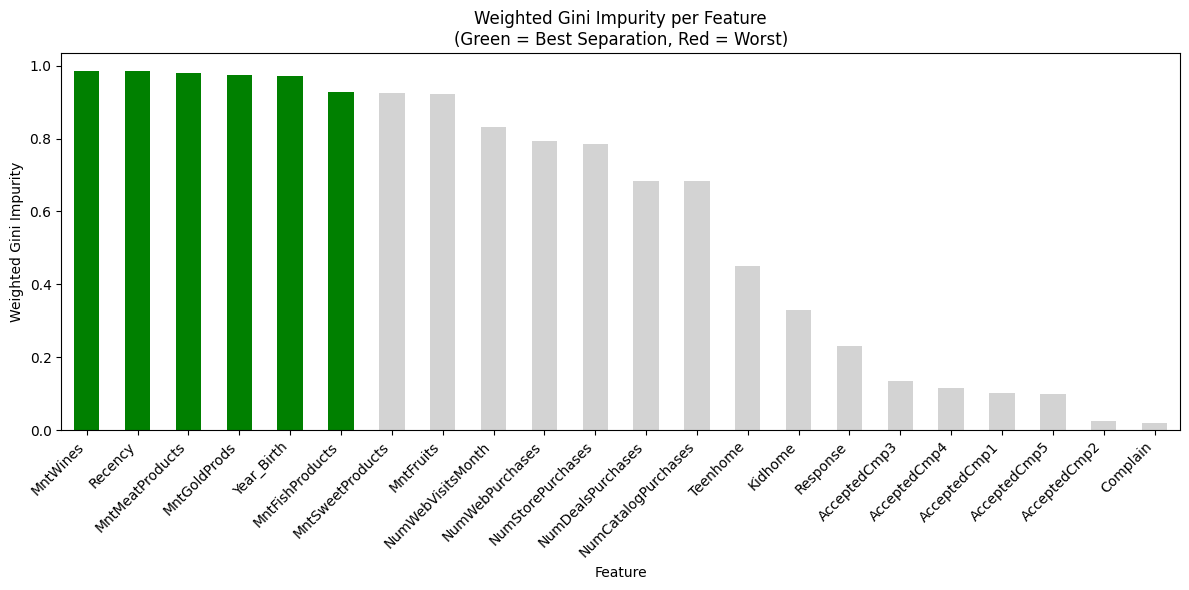

In [38]:
def gini_impurity(series):
    probs = series.value_counts(normalize=True)
    return 1 - (probs ** 2).sum()

df = df_cluster.copy()

features = [col for col in df.columns if col != 'cluster']
cluster_sizes = df['cluster'].value_counts()
total_size = len(df)

weighted_ginis = {}

for feature in features:
    weighted_sum = 0
    for cluster_id, cluster_size in cluster_sizes.items():
        cluster_data = df[df['cluster'] == cluster_id]
        gini = gini_impurity(cluster_data[feature])
        weight = cluster_size / total_size
        weighted_sum += gini * weight
    weighted_ginis[feature] = weighted_sum

# Convert to Series and sort for plot
gini_series = pd.Series(weighted_ginis).sort_values(ascending=False)

# --- Quartile binning for coloring ---
quartiles = pd.qcut(gini_series, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# --- Assign colors ---
color_map = {'Q4': 'green', 'Q3': 'lightgrey', 'Q2': 'lightgrey', 'Q1': 'lightgrey'}
colors = quartiles.map(color_map)

# --- Plot ---
plt.figure(figsize=(12, 6))
gini_series.plot(kind='bar', color=colors)
plt.title('Weighted Gini Impurity per Feature\n(Green = Best Separation, Red = Worst)')
plt.ylabel('Weighted Gini Impurity')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix # Não usaremos essas métricas neste exempl
import graphviz

from sklearn.tree import export_graphviz

customer_tree = tree.DecisionTreeClassifier(max_depth = 7, min_samples_split = 10, min_samples_leaf = 100)
customer_tree.fit(df_cust, k_means_labels)

print("Decision tree model saved to delivery_tree!")
print(customer_tree)
print(df_cluster.columns.values)

Decision tree model saved to delivery_tree!
DecisionTreeClassifier(max_depth=7, min_samples_leaf=100, min_samples_split=10)
['Year_Birth' 'Kidhome' 'Teenhome' 'Recency' 'MntWines' 'MntFruits'
 'MntMeatProducts' 'MntFishProducts' 'MntSweetProducts' 'MntGoldProds'
 'NumDealsPurchases' 'NumWebPurchases' 'NumCatalogPurchases'
 'NumStorePurchases' 'NumWebVisitsMonth' 'AcceptedCmp3' 'AcceptedCmp4'
 'AcceptedCmp5' 'AcceptedCmp1' 'AcceptedCmp2' 'Complain' 'Response'
 'cluster']


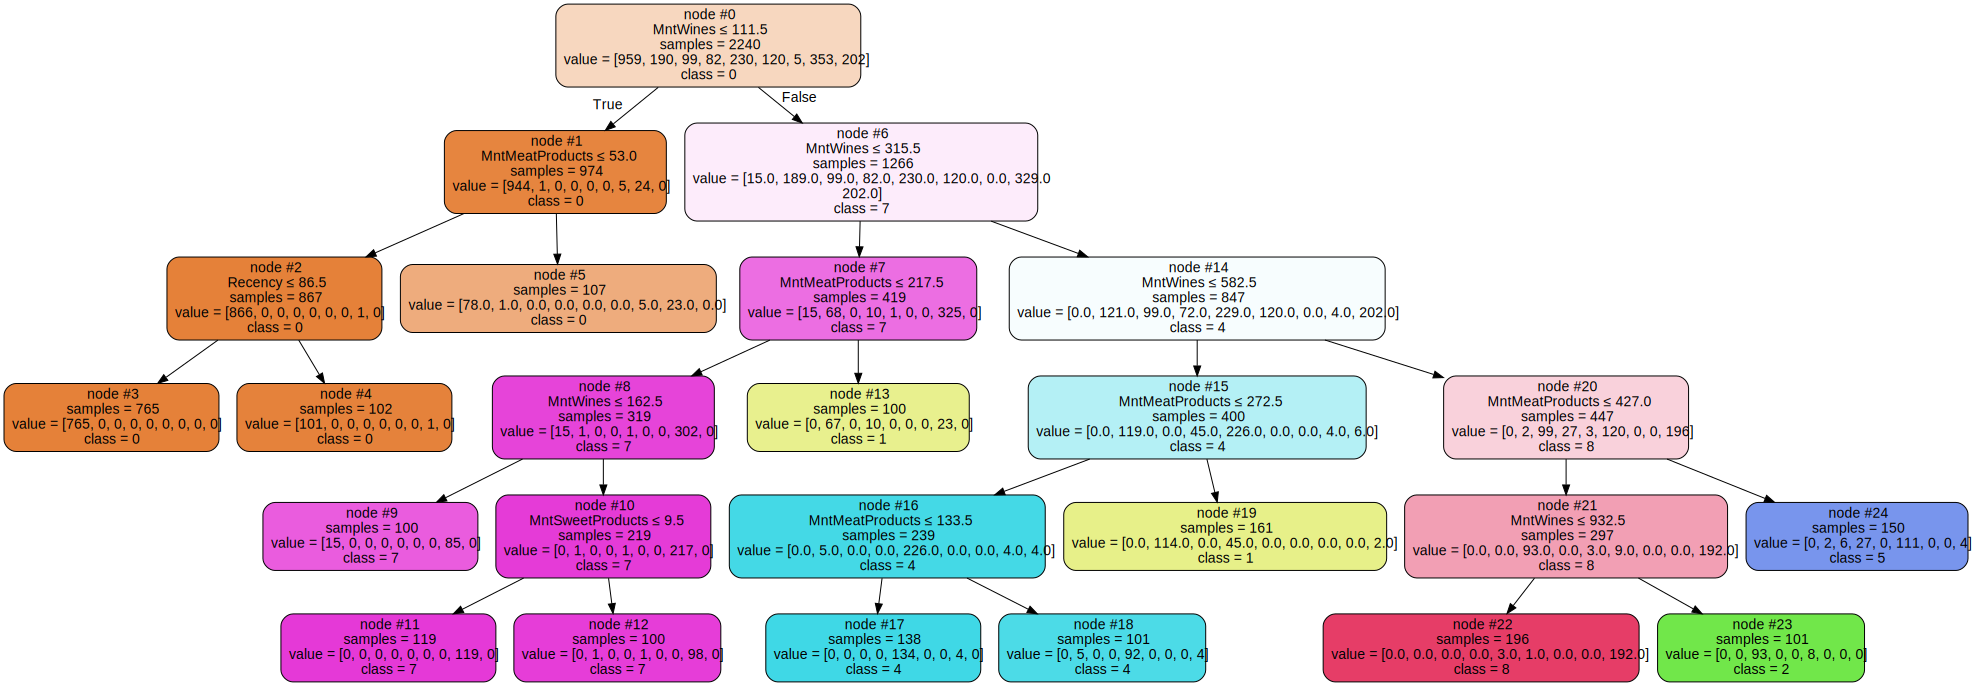

In [40]:
export_graphviz(customer_tree,
                feature_names=list(df_cust.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(k_means_labels.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()

graphviz.Source(delivery_tree_graph)

## Fique Conectado

- [![YouTube](https://img.icons8.com/?size=40&id=19318&format=png&color=000000)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/?size=40&id=13930&format=png&color=000000)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/?size=40&id=32323&format=png&color=000000)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!
  
  
## Autor

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2022       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 27-05-2024       | 1.11     | Eduardo Pecora    | Adequação Decison Trees        |
| 11-06-2025       | 1.11     | Eduardo Pecora    | Gini & Graphics        |

<hr>

&copy; Eduardo Pécora 2025
